The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


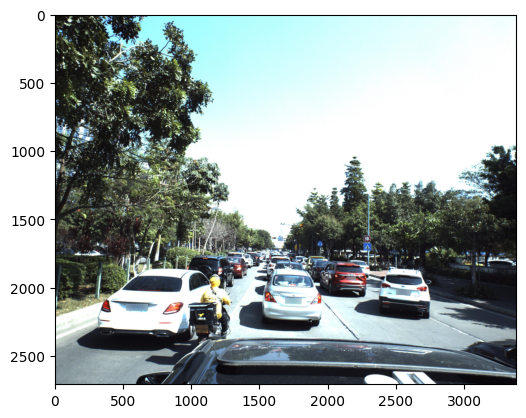

[{'id': 19.0, 'yaw': 0.173722, 'pitch': 0.0399946, 'roll': -3.12226, 'x': 3.17242, 'y': 4.36616, 'z': 17.7905}, {'id': 70.0, 'yaw': 0.170709, 'pitch': 0.057482, 'roll': -3.10591, 'x': 3.0387, 'y': 5.80279, 'z': 25.8937}, {'id': 70.0, 'yaw': 0.229331, 'pitch': 0.0861317, 'roll': -3.07439, 'x': 2.80001, 'y': 8.71163, 'z': 41.4454}, {'id': 37.0, 'yaw': 0.142029, 'pitch': 0.00966681, 'roll': -3.09872, 'x': 0.185597, 'y': 3.20828, 'z': 10.9113}, {'id': 16.0, 'yaw': 0.204709, 'pitch': 0.0518318, 'roll': -3.11403, 'x': -2.71924, 'y': 2.38975, 'z': 7.61769}, {'id': 76.0, 'yaw': 0.185066, 'pitch': 0.017433, 'roll': -3.08271, 'x': -3.96037, 'y': 3.94593, 'z': 16.9747}, {'id': 66.0, 'yaw': 0.172492, 'pitch': 0.0283641, 'roll': -3.10356, 'x': -4.08819, 'y': 5.33032, 'z': 24.9768}, {'id': 50.0, 'yaw': 0.217772, 'pitch': 0.0043509, 'roll': -3.12824, 'x': -5.29812, 'y': 8.21106, 'z': 41.6612}, {'id': 16.0, 'yaw': 0.173718, 'pitch': -2.45943, 'roll': -3.12225, 'x': 22.6347, 'y': 6.83184, 'z': 31.874},

In [17]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from utils import *

intrinsic_matrix = np.array([[2304.5479,   0,          1686.2379],
                          [0,           2305.8757,  1354.9849],
                          [0,           0,          1        ]], 
                         dtype=np.float32)

img = cv2.imread('./img.jpg')
img = np.array(img[:, :, ::-1]) #OpenCV users BGR instead of RGB
plt.imshow(img)
plt.show()

with open('./annotation.txt', 'r') as f:
    anno = f.read()

df_anno = pd.DataFrame(anno2coords(anno))

print(anno2coords(anno))
print(df_anno)


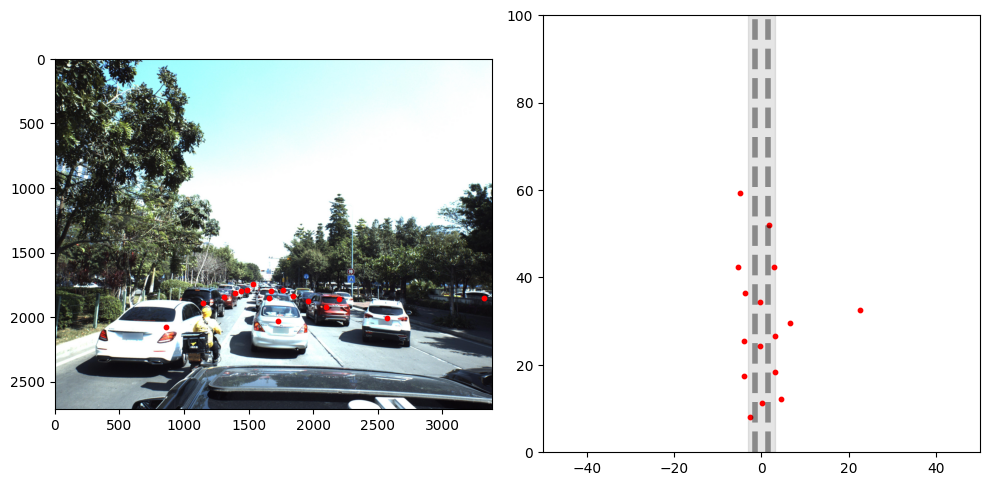

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(10,10))

axes[0].set_aspect(1)
axes[0].imshow(img)
axes[0].scatter(*coords2imgcoords(anno2coords(anno), intrinsic_matrix), color='red', s=10);


road_width = 3
road_xs = [-road_width, road_width, road_width, -road_width, -road_width]
road_ys = [0, 0, 500, 500, 0]

# plt.figure(figsize=(6,6))
axes[1].set_aspect(1)
axes[1].set_xlim(-50,50)
axes[1].set_ylim(0,100)

axes[1].fill(road_xs, road_ys, alpha=0.2, color='gray')
axes[1].plot([road_width/2,road_width/2], [0,500], alpha=0.4, linewidth=4, color='black', ls='--')
axes[1].plot([-road_width/2,-road_width/2], [0,500], alpha=0.4, linewidth=4, color='black', ls='--')

axes[1].scatter(df_anno['x'], np.sqrt(df_anno['z']**2 + df_anno['y']**2), color='red', s=10, alpha=1)

fig.tight_layout()
fig.savefig('./doc/intrinsic_matrix.png', bbox_inches='tight', pad_inches=1)

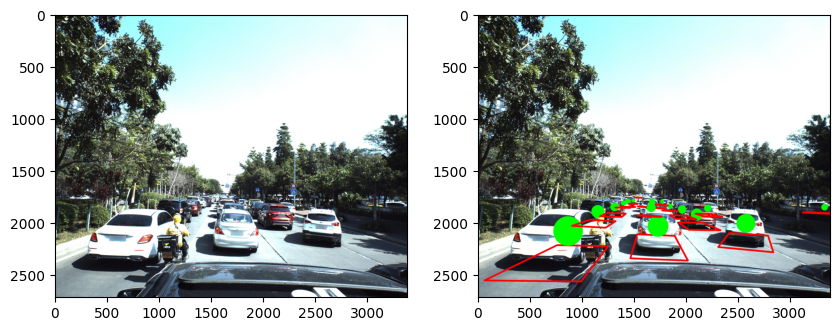

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(10,10))
axes[0].imshow(img)
img_vis = visualize(img, anno2coords(anno), intrinsic_matrix)
axes[1].imshow(img_vis)
plt.show()
fig.savefig('./doc/projection_matrix.png', bbox_inches='tight', pad_inches=1)
